1. Save and Load ML models in Python (With SKlearn) (Pickle and Joblib)

In [2]:
# Creating a Dataset to predict the weight (in Kgs) based on height
import pandas as pd
import numpy as np

Height = pd.DataFrame({"Height": [100,175,190, 115, 160]})
Weight = pd.DataFrame({"Weight":[90, 100, 80, 75, 105]})
df = pd.concat([Height, Weight], axis = 1)
df
# data = [[175,90], [180, 80],[190,100],[155,105], [145,75], [100,80]]
# df = pd.DataFrame(data, columns=(['Height (in cm)', 'Weight (in Kg)']))

,Height,Weight
0,100,90
1,175,100
2,190,80
3,115,75
4,160,105


In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x= df.iloc[:,0].values
y= df.iloc[:,1].values
X= x.reshape(-1, 1)
Y= y.reshape(-1, 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)

regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [4]:
#Saving the model using Pickle
import pickle
pickle.dump(regressor, open('LinearModel_pickle.sav', 'wb'))
from sklearn import metrics
from sklearn.metrics import accuracy_score
#loading the model
load_model = pickle.load(open('LinearModel_pickle.sav', 'rb'))
Y_pred = load_model.predict(Y_test)
print('root mean squared error : ', np.sqrt(
    metrics.mean_squared_error(Y_test, Y_pred)))

root mean squared error :  14.010989010989007


In [5]:
import joblib
#Saving the model using Joblib
filename = 'linear_model_Joblib.sav'
joblib.dump(regressor, open(filename, 'wb'))

# load the model
load_model = joblib.load(open(filename, 'rb'))

y_pred = load_model.predict(X_test)
print('root mean squared error : ', np.sqrt(
    metrics.mean_squared_error(Y_test, Y_pred)))

root mean squared error :  14.010989010989007


Data Preprocessing, Analysis, and Visualization for building a Machine learning model


For this process let's import Churn Modelling Dataset

In [6]:
import pandas as pd
Data = pd.read_csv('Churn_Modelling.csv')
Data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


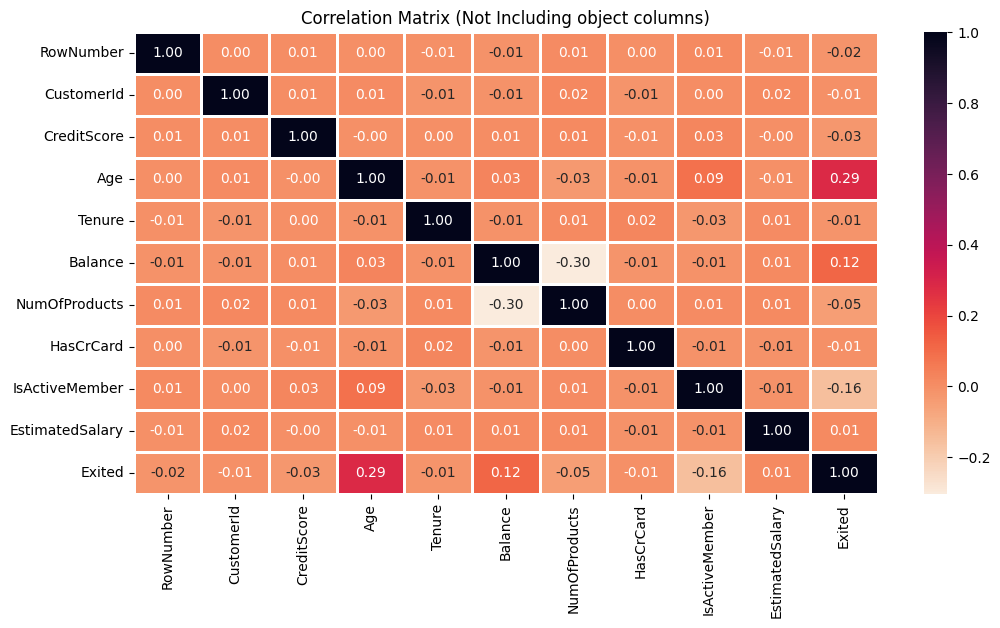

In [8]:
# Plotting Heatmap using sns.heatmap
import matplotlib.pyplot as plt
import seaborn as sns


Num_cols = []
for i in Data.columns:
  if Data[i].dtype != 'object':
    Num_cols.append(i)

DF = Data[Num_cols]


plt.figure(figsize=(12,6))
sns.heatmap(DF.corr(),
            cmap= 'rocket_r',
            fmt ='.2f',
            linewidths = 2,
            annot= True
            )
plt.title("Correlation Matrix (Not Including object columns)")
plt.show()

In [9]:
# The all possible values of Cmap/ Colormaps are
x = plt.colormaps()
for i in range(len(x)):
  print(f"Cmap{i+1}: {x[i]}")

Cmap1: magma
Cmap2: inferno
Cmap3: plasma
Cmap4: viridis
Cmap5: cividis
Cmap6: twilight
Cmap7: twilight_shifted
Cmap8: turbo
Cmap9: Blues
Cmap10: BrBG
Cmap11: BuGn
Cmap12: BuPu
Cmap13: CMRmap
Cmap14: GnBu
Cmap15: Greens
Cmap16: Greys
Cmap17: OrRd
Cmap18: Oranges
Cmap19: PRGn
Cmap20: PiYG
Cmap21: PuBu
Cmap22: PuBuGn
Cmap23: PuOr
Cmap24: PuRd
Cmap25: Purples
Cmap26: RdBu
Cmap27: RdGy
Cmap28: RdPu
Cmap29: RdYlBu
Cmap30: RdYlGn
Cmap31: Reds
Cmap32: Spectral
Cmap33: Wistia
Cmap34: YlGn
Cmap35: YlGnBu
Cmap36: YlOrBr
Cmap37: YlOrRd
Cmap38: afmhot
Cmap39: autumn
Cmap40: binary
Cmap41: bone
Cmap42: brg
Cmap43: bwr
Cmap44: cool
Cmap45: coolwarm
Cmap46: copper
Cmap47: cubehelix
Cmap48: flag
Cmap49: gist_earth
Cmap50: gist_gray
Cmap51: gist_heat
Cmap52: gist_ncar
Cmap53: gist_rainbow
Cmap54: gist_stern
Cmap55: gist_yarg
Cmap56: gnuplot
Cmap57: gnuplot2
Cmap58: gray
Cmap59: hot
Cmap60: hsv
Cmap61: jet
Cmap62: nipy_spectral
Cmap63: ocean
Cmap64: pink
Cmap65: prism
Cmap66: rainbow
Cmap67: seismic
Cma

Now let's find out the distribution of CreditScore, Age, Balance, Estimated Salary

<ipython-input-10-6471580f6bc2>:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,1)
<ipython-input-10-6471580f6bc2>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(DF['CreditScore'])
<ipython-input-10-6471580f6bc2>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to

<Axes: xlabel='EstimatedSalary', ylabel='Density'>

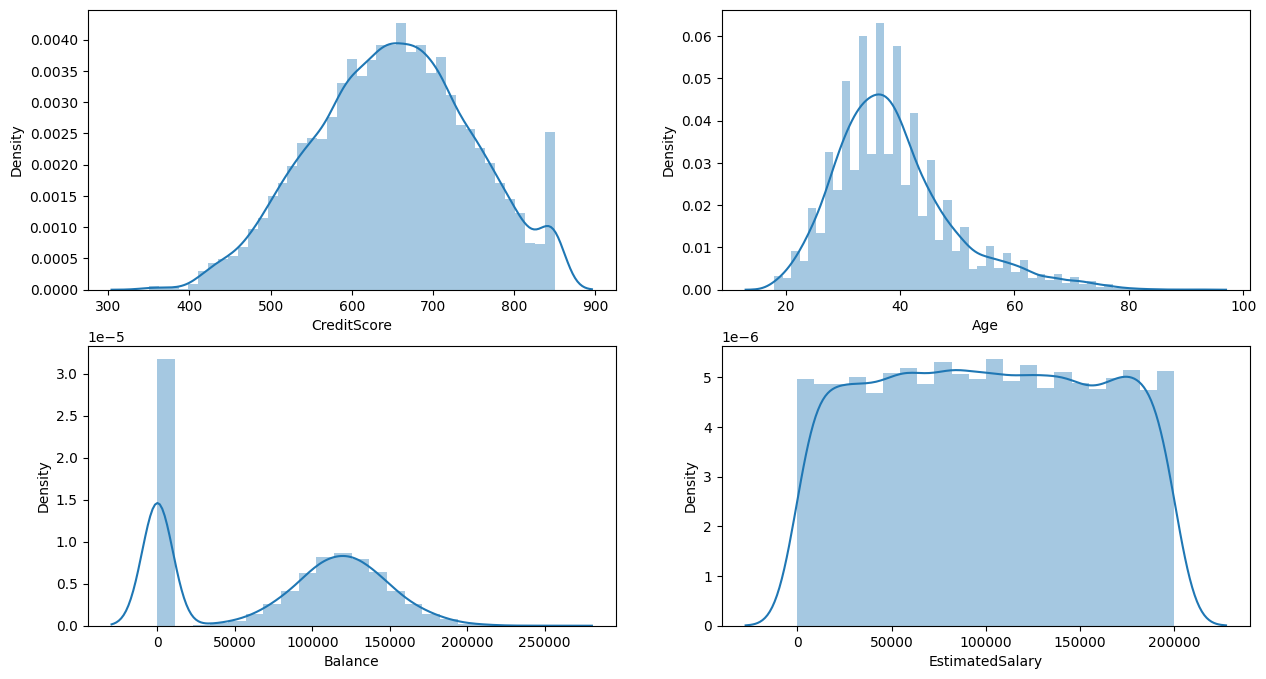

In [10]:
from matplotlib.ticker import FuncFormatter
List = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
plt.subplots(figsize=(15,8))
# index = 1
# for i in List:
#   plt.subplot(2,2,index)
#   sns.distplot(Data[i])
#   index+=1

plt.subplot(2,2,1)
sns.distplot(DF['CreditScore'])
plt.subplot(2,2,2)
sns.distplot(DF['Age'])
plt.subplot(2,2,3)
sns.distplot(DF['Balance'])
plt.subplot(2,2,4)
sns.distplot(DF['EstimatedSalary'])

Categorical Count of each category in Gender and Geography

In [11]:
Data_gender_count = Data.groupby(['Gender'])['Gender'].count().reset_index(name= 'Count')
Data_Geo_count = Data.groupby(['Geography'])['Geography'].count().reset_index(name= 'Count')

<ipython-input-12-00625ef0f57d>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,1)


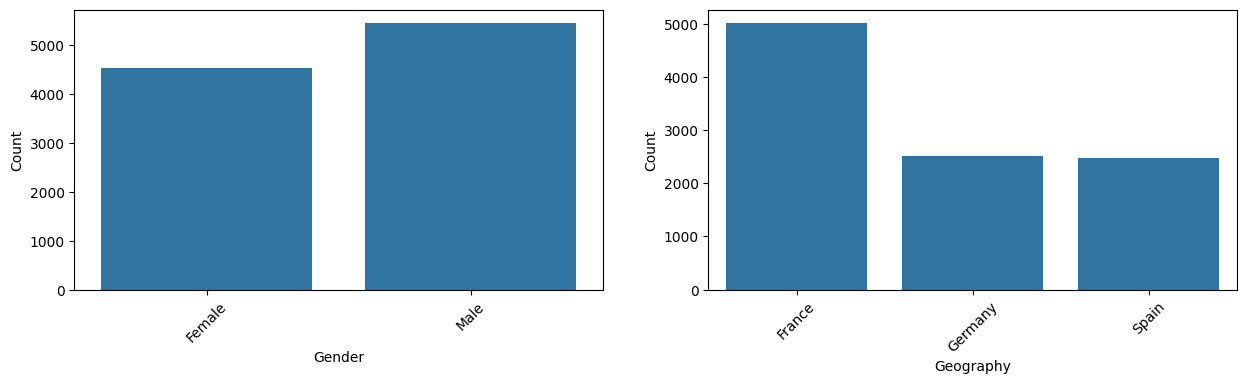

In [12]:
plt.subplots(figsize=(15,8))
plt.subplot(2,2,1)
plt.xticks(rotation = 45)
sns.barplot(x=Data_gender_count['Gender'], y = Data_gender_count['Count'] )
plt.subplot(2,2,2)
plt.xticks(rotation = 45)
sns.barplot(x= Data_Geo_count['Geography'], y= Data_Geo_count['Count'])
plt.show()

<ipython-input-13-960b6c3a2e83>:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,index)


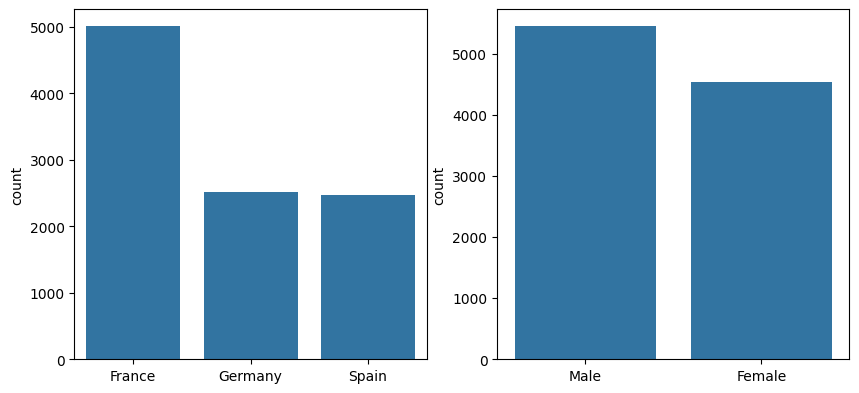

In [13]:
# for bigger Dataset
categorical_cols = []
for i in Data.columns:
  if Data[i].dtype == 'object' and Data[i].nunique() <= 10:
    categorical_cols.append(i)
plt.subplots(figsize = (10,10))
index = 1
for i in categorical_cols:
  y = Data[i].value_counts()
  plt.subplot(2,2,index)
  sns.barplot(x = list(y.index), y=y)
  index+= 1

Data Preprocessing

In [14]:
# Check if any column contains Null value
Data.isnull().any().reset_index(name= 'True/False')
# if yes then we can do Data Inputation steps

,index,True/False
0,RowNumber,False
1,CustomerId,False
2,Surname,False
3,CreditScore,False
4,Geography,False
5,Gender,False
6,Age,False
7,Tenure,False
8,Balance,False
9,NumOfProducts,False


In [107]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Data["Geography"] = le.fit_transform(Data["Geography"])
Data["Gender"] = le.fit_transform(Data["Gender"])

In [108]:
# Now we are splitting the data in predicting value and Exited
X = Data.iloc[:, 3:13].values
Y = Data.iloc[:, 13:14].values

In [109]:
#Splitting the Data in training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)


In [110]:
# Normalizing the Data using Standard Scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

Now using SKlearn we are training 4 models :
1. KNeighbors Classifier
2. Random Forest Classifier
3. SVC
3. Logistic Regression

In [113]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# from Evaluating the Models
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors= 3)
RFC = RandomForestClassifier(n_estimators = 7, criterion = 'entropy', random_state= 7)
SVM = SVC()
LR = LogisticRegression()

for clf in (knn, RFC, SVM, LR):
  clf.fit(x_train, y_train.ravel())
  y_pred = clf.predict(x_test)
  print(f"Accuracy of {clf.__class__.__name__} = {100*metrics.accuracy_score(y_test, y_pred)}")



Accuracy of KNeighborsClassifier = 84.0
Accuracy of RandomForestClassifier = 84.6
Accuracy of SVC = 85.8
Accuracy of LogisticRegression = 81.55


Building a ML model Using J48 Classifier

J48 is a machine learning decision tree classification algorithm based on Iterative Dichotomiser 3. It is very helpful in examine the data categorically and continuously.

Getting Regression Model Summary in Scikit Learn

In [118]:
y_pred = LR.predict(x_test)
Accuracy = metrics.accuracy_score(y_test, y_pred)
Accuracy *100

81.55

In [125]:
# summary of the model
print('model intercept :', LR.intercept_)
print('model coefficients : ', LR.coef_)
print('Model score : ', LR.score(X, Y))

model intercept : [-1.61517376]
model coefficients :  [[-0.0672648   0.08943059 -0.26959964  0.75472247 -0.04025947  0.30257658
  -0.0270898  -0.00324732 -0.53600774  0.01914003]]
Model score :  0.2052


In [127]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

# loading the csv file
df = pd.read_csv('headbrain1.csv')
print(df.head())

# fitting the model
df.columns = ['Head_size', 'Brain_weight']
model = smf.ols(formula='Head_size ~ Brain_weight',
                data=df).fit()

# model summary
print(model.summary())

   Head Size(cm^3)  Brain Weight(grams)
0             4512                 1530
1             3738                 1297
2             4261                 1335
3             3777                 1282
4             4177                 1590
                            OLS Regression Results                            
Dep. Variable:              Head_size   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     416.5
Date:                Tue, 24 Sep 2024   Prob (F-statistic):           5.96e-54
Time:                        21:38:24   Log-Likelihood:                -1613.4
No. Observations:                 237   AIC:                             3231.
Df Residuals:                     235   BIC:                             3238.
Df Model:                           1                                         
Covariance Type:            nonrobust            